### Overview

This notebook performs exploratory data analysis (EDA) on the "Students Performance in Exams" dataset from Kaggle. We analyze descriptive statistics and generate visualizations to uncover patterns related to students’ performance in math, reading, and writing.

In [83]:
import kagglehub 

path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\SAYHI\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


In [84]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
path+="\StudentsPerformance.csv"
df=pd.read_csv(path)
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\143410134.py:4: SyntaxWarning: invalid escape sequence '\S'
  path+="\StudentsPerformance.csv"


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [75]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [65]:
df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [76]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [66]:
df.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Observations:

- There are no missing values in the dataset.

- Scores are generally out of 100.

- Gender, ethnicity, parental education, lunch type, and test preparation are all categorical variables.

In [67]:
df.groupby(['gender','parental level of education','test preparation course','lunch'])[['math score','reading score','writing score']].mean().round(1)

math score  \
gender parental level of education test preparation course lunch                      
female associate's degree          completed               free/reduced        67.9   
                                                           standard            70.9   
                                   none                    free/reduced        53.0   
                                                           standard            67.1   
       bachelor's degree           completed               free/reduced        66.5   
                                                           standard            73.6   
                                   none                    free/reduced        61.6   
                                                           standard            69.7   
       high school                 completed               free/reduced        57.3   
                                                           standard            66.9   
                                   none                    free/reduced        47.8   
                                                           standard            63.6   
       master's degree             completed               free/reduced        63.6   
                                                           standard            76.1   
                                   none                    free/reduced        52.0   
                                                           standard            70.1   
       some college                completed               free/reduced        58.3   
                                                           standard            73.8   
                                   none                    free/reduced        58.5   
                                                           standard            67.2   
       some high school            completed               free/reduced        55.9   
                                                           standard            68.0   
                                   none                    free/reduced        46.1   
                                                           standard            64.2   
male   associate's degree          completed               free/reduced        68.9   
                                                           standard            77.3   
                                   none                    free/reduced        65.1   
                                                           standard            71.2   
       bachelor's degree           completed               free/reduced        67.0   
                                                           standard            80.4   
                                   none                    free/reduced        59.6   
                                                           standard            72.1   
       high school                 completed               free/reduced        64.6   
                                                           standard            70.2   
                                   none                    free/reduced        55.2   
                                                           standard            67.3   
       master's degree             completed               free/reduced        68.6   
                                                           standard            91.0   
                                   none                    free/reduced        63.2   
                                                           standard            80.9   
       some college                completed               free/reduced        64.6   
                                                           standard            80.1   
                                   none                    free/reduced        61.3   
                                                           standard            68.2   
       some high school            completed               free/reduced

female         Axes(0.1,0.15;0.363636x0.75)
male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

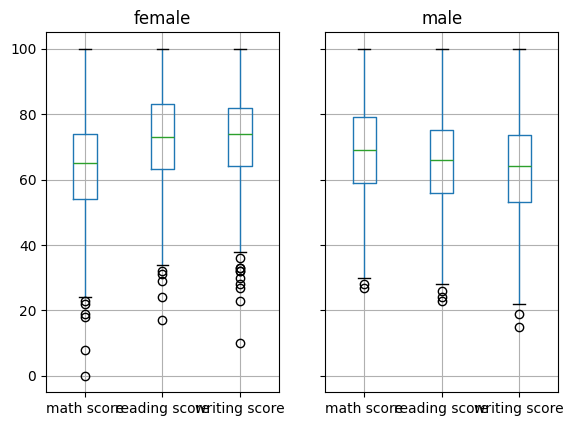

In [68]:
df.groupby('gender').boxplot()

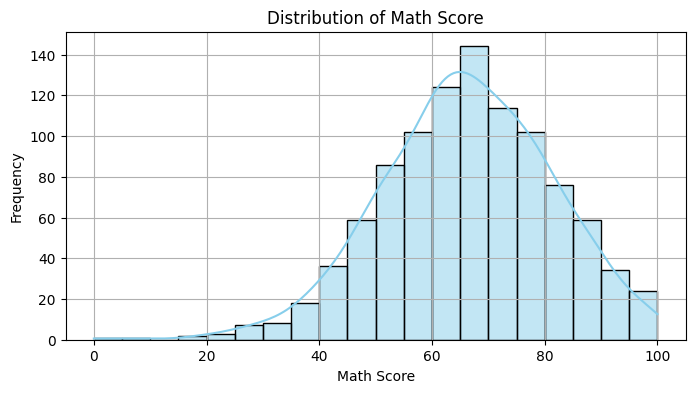

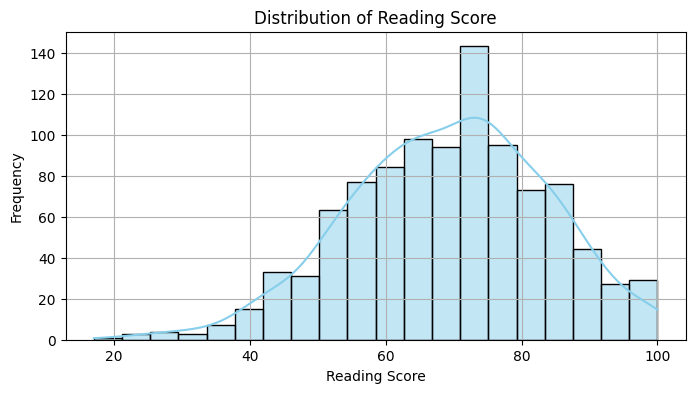

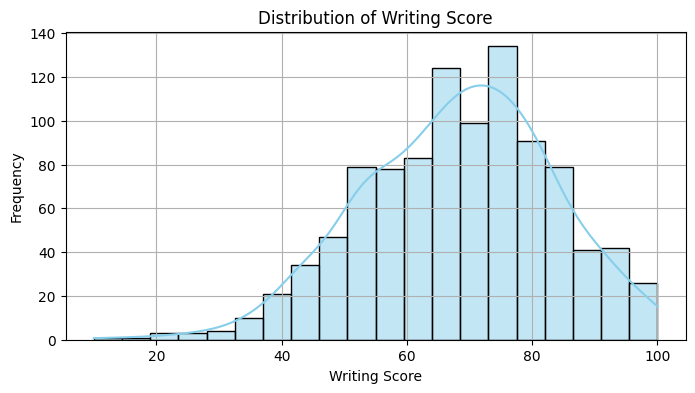

In [77]:
for col in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### Observations:

- All three score distributions are roughly normal.

- Math scores are slightly left-skewed (more low scores).

- Reading and writing scores are more concentrated in the mid-to-high range.

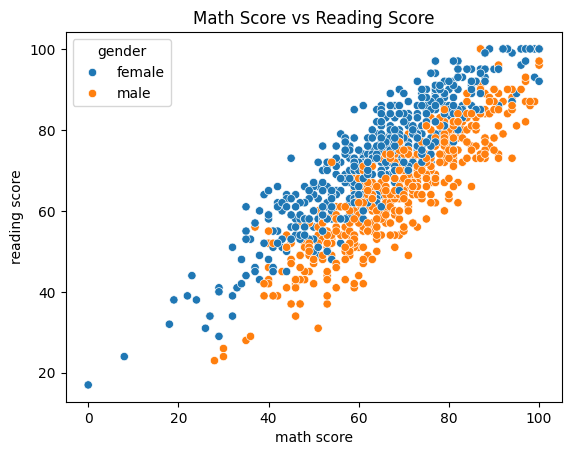

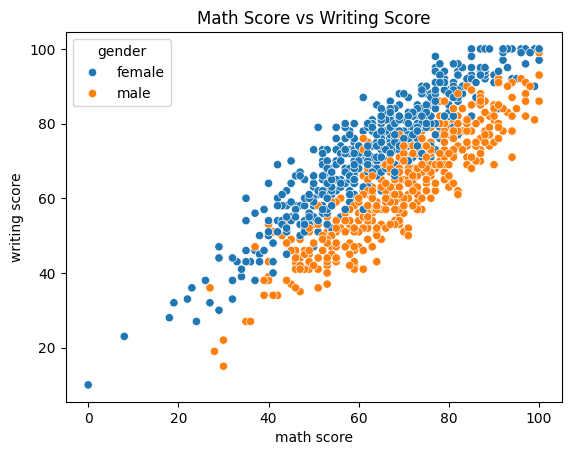

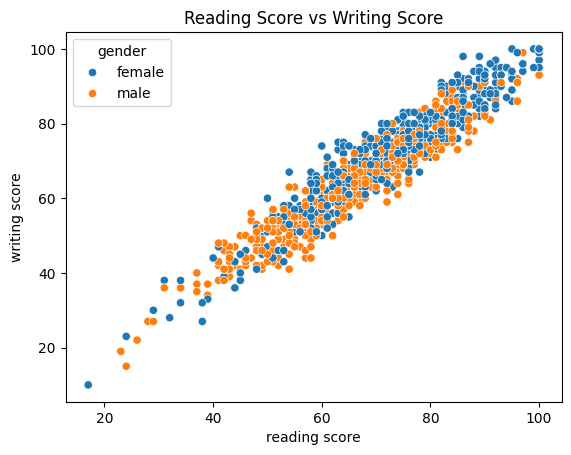

In [78]:
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender')
plt.title("Math Score vs Reading Score")
plt.show()

sns.scatterplot(data=df, x='math score', y='writing score', hue='gender')
plt.title("Math Score vs Writing Score")
plt.show()

sns.scatterplot(data=df, x='reading score', y='writing score', hue='gender')
plt.title("Reading Score vs Writing Score")
plt.show()


### Observations:

- There’s a strong positive correlation between reading and writing scores.

- Math scores show moderate correlation with reading and writing scores.

- No major difference in correlation trends based on gender.

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\384090488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='pastel')


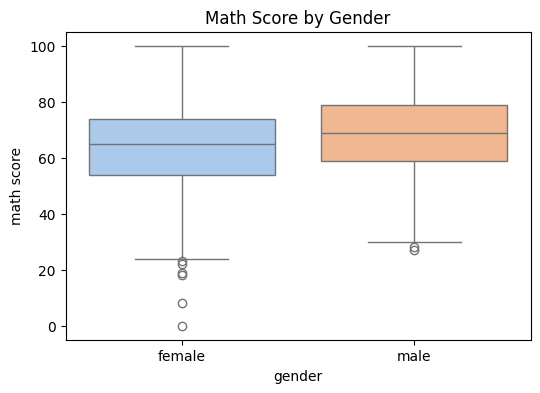

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\384090488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='pastel')


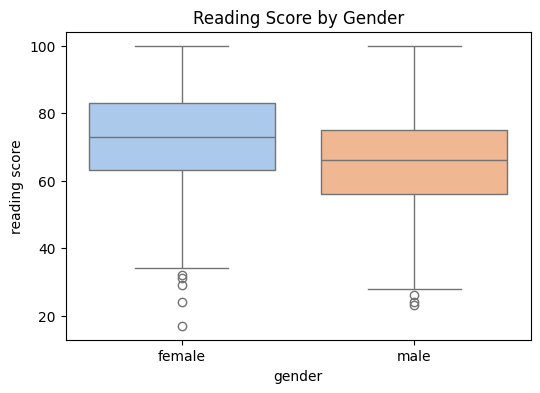

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\384090488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y=col, data=df, palette='pastel')


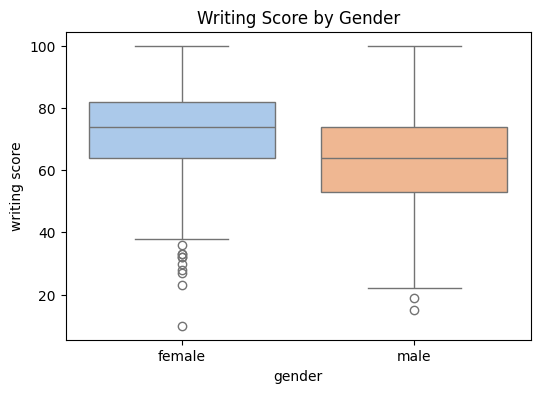

In [79]:
for col in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='gender', y=col, data=df, palette='pastel')
    plt.title(f'{col.title()} by Gender')
    plt.show()


### Observations:

- Males tend to score slightly higher in math.

- Females perform better in reading and writing.

- Variability in scores is similar for both genders.

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\2875756245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y=col, data=df, palette='Set2')


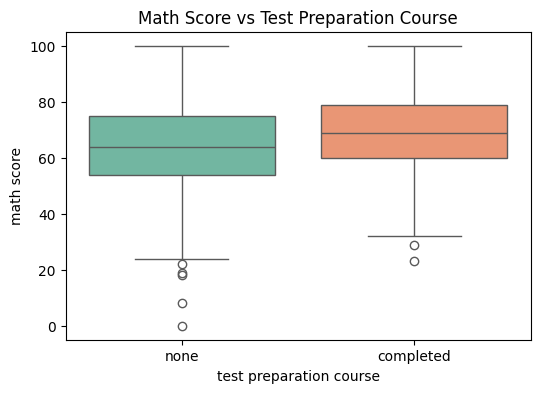

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\2875756245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y=col, data=df, palette='Set2')


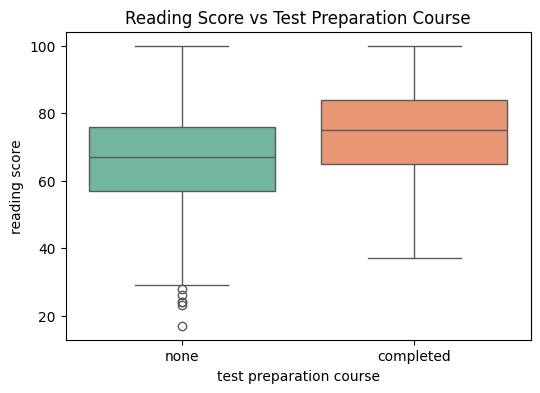

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\2875756245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test preparation course', y=col, data=df, palette='Set2')


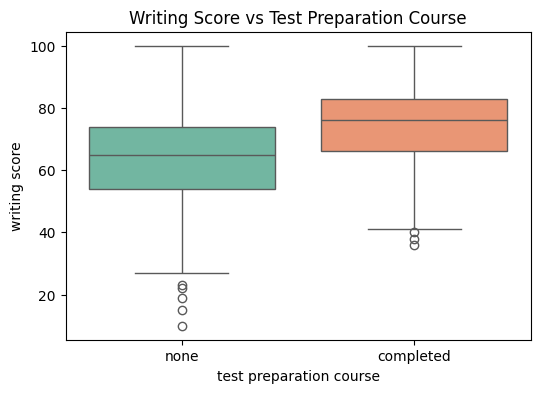

In [80]:
# Comparing scores for those who completed vs didn't complete test preparation
for col in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='test preparation course', y=col, data=df, palette='Set2')
    plt.title(f'{col.title()} vs Test Preparation Course')
    plt.show()

### Observations:

- Students who completed the test preparation course scored noticeably higher across all subjects.

- Suggests the preparation course has a positive impact.

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\227584388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set3')


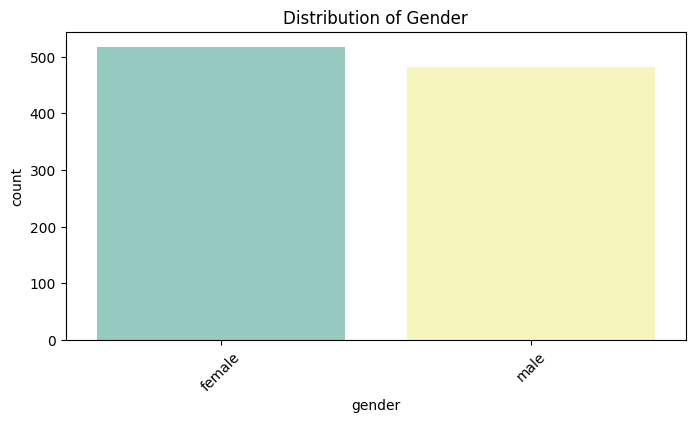

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\227584388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set3')


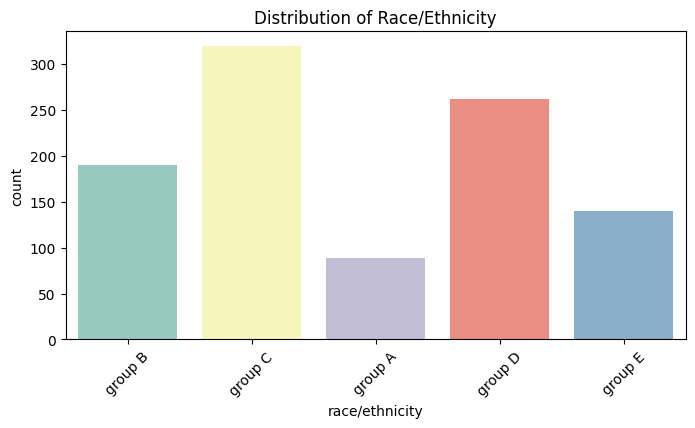

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\227584388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set3')


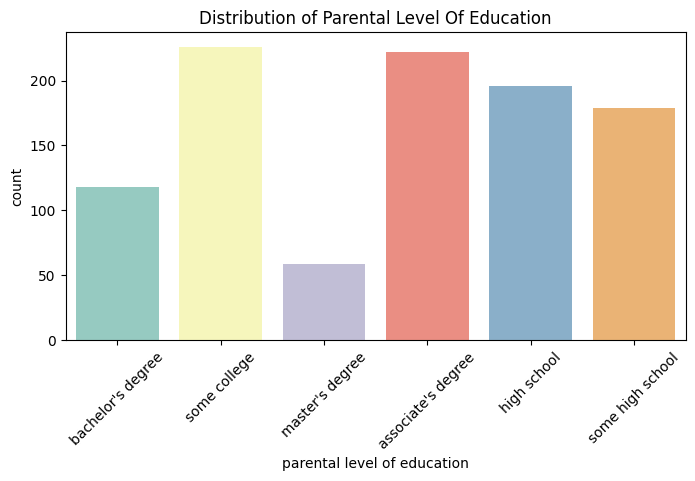

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\227584388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set3')


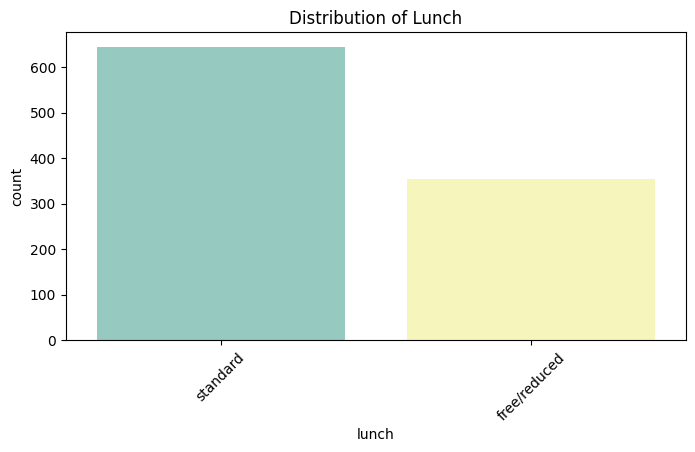

C:\Users\SAYHI\AppData\Local\Temp\ipykernel_13760\227584388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set3')


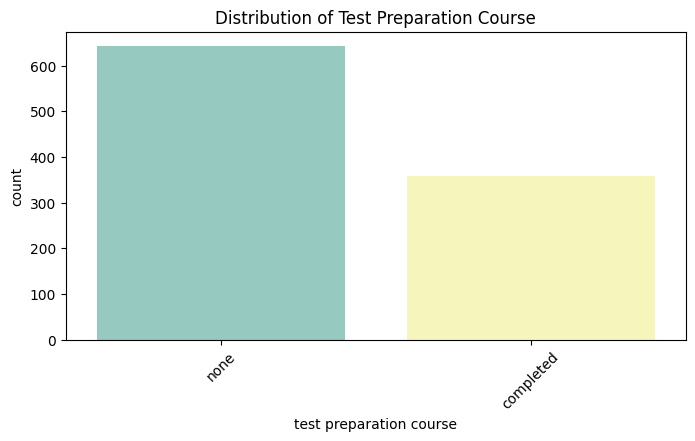

In [81]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set3')
    plt.title(f'Distribution of {col.title()}')
    plt.xticks(rotation=45)
    plt.show()

### Observations:

- Most students are from group C ethnicity.

- A large portion of students have standard lunch.

- Only a minority completed the test preparation course.

- Parental education is most commonly some college or associate’s degree.

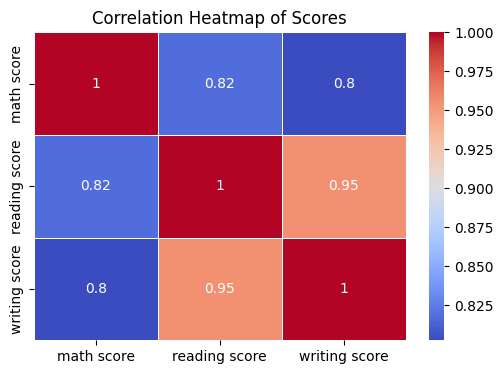

In [82]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Scores')
plt.show()

### Observations:

- Strong correlation between reading and writing scores (≈ 0.95).

- Math score shows moderate correlation with reading and writing.

- Indicates students who perform well in one subject are likely to perform well in others.

#### Key Takeaways:

1. Female students outperform males in reading and writing; males do better in math.

2. Test preparation has a clear positive impact.

3. Reading and writing are highly correlated — improvement in one may support the other.

4. Socio-demographic factors such as lunch type and parental education show some indirect impact on performance.